In [24]:
#Read through all enzymes in EC 3. 
import pandas as pd

# Read the Excel file
df = pd.read_excel('BCH394 Final Project pH optima.xlsx')

# Assuming the column containing EC 3 enzymes is named 'EC Enzymes', replace it with the actual column name
ec_enzyme_column = df['EC Class']

In [25]:
#!/usr/bin/python
import zeep
from zeep import Client
import hashlib

wsdl = "https://www.brenda-enzymes.org/soap/brenda_zeep.wsdl"
password = hashlib.sha256("Helenasung123!2".encode("utf-8")).hexdigest()
client = Client(wsdl)

# Define function to retrieve optimum pHs for a given EC number
def get_optimum_pHs_for_ec(ec_number):
    parameters = ("sunggyunglee@utexas.edu", password, f"ecNumber*{ec_number}", "phOptimum*", "phOptimumMaximum*", "commentary*", "organism*", "literature*")
    result_string = client.service.getPhOptimum(*parameters)
    
    pH_optimum_values = []
    organisms = []
    
    for entry in result_string:
        ph_optimum = entry['phOptimum']
        organism = entry['organism']
        if ph_optimum and ph_optimum != '-999':
            pH_optimum_values.append(float(ph_optimum))
            organisms.append(organism)
    
    return organisms, pH_optimum_values

# List of EC 3 enzymes (replace with actual list)
enzymes_ec_3 = ec_enzyme_column 

# Output data for each enzyme
with open("enzyme_optimum_pHs.txt", "w") as file:
    file.write("EC Number\tOrganism\tpH Optimum\n")
    for enzyme_ec in enzymes_ec_3:
        organisms, pH_optimum_values = get_optimum_pHs_for_ec(enzyme_ec)
        for organism, pH_optimum in zip(organisms, pH_optimum_values):
            file.write(f"{enzyme_ec}\t{organism}\t{pH_optimum}\n")

In [33]:
# Function to clean up redundancy for pH optima in an input file
def clean_up_pH(input_file_path, output_file_path):
    enzyme_data = {}

    # Read data from file and write to new file
    with open(input_file_path, "r") as input_file, open(output_file_path, "w") as output_file:
        header = input_file.readline()  # Read and write the header
        output_file.write(header)

        for line in input_file:
            parts = line.strip().split("\t")
            enzyme_ec = parts[0]
            organism = parts[1]
            pH_optimum = float(parts[2])

            # Check if the combination of enzyme and organism has already been encountered
            key = (enzyme_ec, organism)
            if key not in enzyme_data:
                # Write the first occurrence of the enzyme and organism combination
                enzyme_data[key] = pH_optimum
                output_file.write(f"{enzyme_ec}\t{organism}\t{pH_optimum}\n")

#Output cleaned up file                 
clean_up_pH("enzyme_optimum_pHs.txt", "enzyme_optimum_pHs_clean.txt")

Enzyme Counts:
{'Acidic': 1737, 'Neutral': 7928, 'Alkaline': 968}


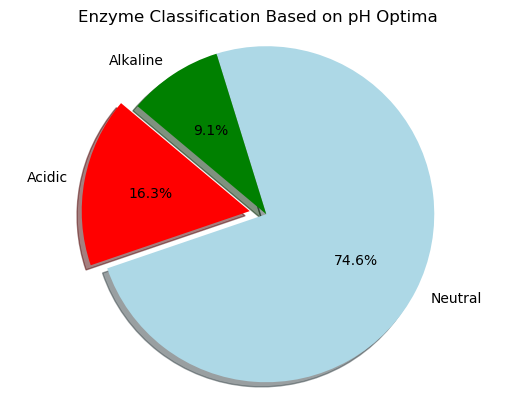

In [37]:
import matplotlib.pyplot as plt

def classify_enzymes(data_file):
    # Dictionary to hold counts for each category
    counts = {'Acidic': 0, 'Neutral': 0, 'Alkaline': 0}

    # Read data from the file and classify enzymes
    with open(data_file, 'r') as file:
        next(file)  # Skip header
        for line in file:
            _, _, pH_optimum = line.strip().split('\t')
            pH_optimum = float(pH_optimum)

            if pH_optimum < 5:
                counts['Acidic'] += 1
            elif 5 <= pH_optimum <= 8:
                counts['Neutral'] += 1
            else:
                counts['Alkaline'] += 1

    return counts

def plot_pie_chart(counts):
    labels = counts.keys()
    sizes = counts.values()
    colors = ['red', 'lightblue', 'green']
    explode = (0.1, 0, 0)  # explode the 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('Enzyme Classification Based on pH Optima')
    plt.show()

# Example usage
data_file = 'enzyme_optimum_pHs_clean.txt'
enzyme_counts = classify_enzymes(data_file)
print("Enzyme Counts:")
print(enzyme_counts)

plot_pie_chart(enzyme_counts)